In [351]:
%pip install numpy
%pip install scipy
%pip install pandas

import numpy as np 
import pandas as pd
import scipy.optimize 


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [352]:
import sqlite3
con = sqlite3.connect("../db.sqlite3")
cur = con.cursor()
# for row in cur.execute('SELECT * FROM web_movie;'):
    # print(row)
df = pd.read_sql_query("SELECT * FROM web_movie;", con)

In [353]:
df["title"].value_counts()

Drishyam                    2
The_Shawshank_Redemption    1
Awakenings                  1
Tombstone                   1
The_Sandlot                 1
                           ..
Guardians_of_the_Galaxy     1
Blade_Runner_2049           1
Her                         1
Bohemian_Rhapsody           1
The_39_Steps                1
Name: title, Length: 999, dtype: int64

In [354]:
movie = pd.read_sql_query("SELECT * FROM web_movie;", con)
rating = pd.read_sql_query("SELECT * FROM web_myrating;", con)
df = movie.merge(rating, how="right", on="movie_id")
df

,movie_id,movie_logo_link,movie_logo,title,released_year,certificate,runtime,genre,imdb_ratings,overview,score,director,stars,no_of_votes,id,user_id,rating
0,1,https://images-na.ssl-images-amazon.com/images...,Vikram_Vedha.jpg,The_Shawshank_Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",2343110,1.0,1,5
1,2,https://images2.alphacoders.com/110/thumb-1920...,The_Godfather.svg,The_Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1620367,2.0,1,4
2,3,https://wallpapercave.com/wp/wp2695372.jpg,The_Dark_Knight.jpg,The_Dark_Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2303232,3.0,1,3
3,4,https://images8.alphacoders.com/782/782558.jpg,The_Godfather_Part_II.jpg,The_Godfather_Part_II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",1129952,4.0,1,2
4,5,https://wallpapercave.com/wp/wp2330961.jpg,12_Angry_Men.jpg,12_Angry_Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,"Henry Fonda, Lee J. Cobb, Martin Balsam, John ...",689845,5.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5998,595,None,English_Vinglish.jpg,English_Vinglish,2012,U,134 min,"Comedy, Drama, Family",7.8,"A quiet, sweet tempered housewife endures smal...",NaN,Gauri Shinde,"Sridevi, Adil Hussain, Mehdi Nebbou, Priya Anand",33618,5999.0,15,4
5999,240,https://m.media-amazon.com/images/M/MV5BMDVhMj...,Salinui_chueok.jpg,Salinui_chueok,2003,UA,131 min,"Crime, Drama, Mystery",8.1,"In a small Korean province in 1986, two detect...",82.0,Bong Joon Ho,"Kang-ho Song, Kim Sang-kyung, Roe-ha Kim, Jae-...",139558,6000.0,9,5
6000,1,https://images-na.ssl-images-amazon.com/images...,Vikram_Vedha.jpg,The_Shawshank_Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",2343110,NaN,16,5
6001,10,https://wallpapercave.com/wp/wp2835231.jpg,Fight_Club.jpg,Fight_Club,1999,A,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf, Zach Grenier",1854740,NaN,16,5


In [355]:
user_movie_df = df.pivot_table(index=["user_id"], columns=["title"], values="rating")
user_movie_df

title,(500)_Days_of_Summer,12_Angry_Men,12_Years_a_Slave,1917,2001:_A_Space_Odyssey,21_Grams,25th_Hour,28_Days_Later...,300,3:10_to_Yuma,...,Zelig,Zerkalo,Zindagi_Na_Milegi_Dobara,Zodiac,Zombieland,Zootopia,Zulu,Zwartboek,À_bout_de_souffle,Ôkami_kodomo_no_Ame_to_Yuki
user_id,,,,,,,,,,,,,,,,,,,,,
1,4.0,1.0,2.0,1.0,4.0,3.0,4.0,2.0,4.0,4.0,...,1.0,3.00,4.0,3.0,5.000000,1.000000,5.00,5.0,4.000000,3.0
2,NaN,NaN,4.0,4.0,NaN,3.0,4.0,3.0,4.0,NaN,...,NaN,2.75,3.5,NaN,NaN,2.666667,3.00,NaN,NaN,NaN
3,1.0,NaN,3.0,4.0,1.0,3.0,3.0,NaN,NaN,3.0,...,1.0,2.00,NaN,NaN,1.666667,NaN,3.00,5.0,3.000000,5.0
4,4.0,NaN,2.0,NaN,1.0,4.5,3.0,NaN,NaN,4.0,...,5.0,NaN,4.0,4.0,NaN,NaN,2.25,NaN,3.666667,3.0
5,4.5,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,3.0
6,1.0,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,...,5.0,5.00,NaN,3.0,NaN,NaN,5.00,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.00,NaN,NaN,1.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN


In [356]:
movie_name = "Star_Wars"
movie_name = user_movie_df[movie_name]
user_movie_df.corrwith(movie_name).sort_values(ascending=False).head(20)

c:\Users\jaymr\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\jaymr\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\jaymr\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\jaymr\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\jaymr\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Blood_Simple                                     1.0
Strangers_on_a_Train                             1.0
To_Have_and_Have_Not                             1.0
Todo_sobre_mi_madre                              1.0
Toki_o_kakeru_shôjo                              1.0
Toy_Story                                        1.0
The_Best_Years_of_Our_Lives                      1.0
Call_Me_by_Your_Name                             1.0
Toy_Story_4                                      1.0
JFK                                              1.0
Jaws                                             1.0
Swades:_We,_the_People                           1.0
Kill_Bill:_Vol._1                                1.0
Tropa_de_Elite                                   1.0
Kokuhaku                                         1.0
True_Romance                                     1.0
Les_triplettes_de_Belleville                     1.0
Star_Wars_Episode_V_-_The_Empire_Strikes_Back    1.0
E.T._the_Extra-Terrestrial                    

In [357]:
random_user = 16
random_user_df = user_movie_df[user_movie_df.index == random_user]
random_user_df

title,(500)_Days_of_Summer,12_Angry_Men,12_Years_a_Slave,1917,2001:_A_Space_Odyssey,21_Grams,25th_Hour,28_Days_Later...,300,3:10_to_Yuma,...,Zelig,Zerkalo,Zindagi_Na_Milegi_Dobara,Zodiac,Zombieland,Zootopia,Zulu,Zwartboek,À_bout_de_souffle,Ôkami_kodomo_no_Ame_to_Yuki
user_id,,,,,,,,,,,,,,,,,,,,,
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [358]:
movies_watched = random_user_df.columns.value_counts()
movies_watched 

(500)_Days_of_Summer                        1
Serenity                                    1
Saw                                         1
Scarface                                    1
Scarface:_The_Shame_of_the_Nation           1
                                           ..
Harry_Potter_and_the_Prisoner_of_Azkaban    1
Harry_Potter_and_the_Sorcerer's_Stone       1
Harvey                                      1
Hauru_no_ugoku_shiro                        1
Ôkami_kodomo_no_Ame_to_Yuki                 1
Name: title, Length: 999, dtype: int64

In [359]:
user_movie_df.loc[user_movie_df.index == random_user, user_movie_df.columns == "Drama"]

title
user_id
16


In [360]:
len(movies_watched)

999

In [361]:
movies_watched_df = user_movie_df[movies_watched]
movies_watched_df

KeyError: "None of [Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,\n            ...\n            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],\n           dtype='int64', name='title', length=999)] are in the [columns]"

In [ ]:
movies_watched_df.shape


(14, 7)

In [ ]:
user_movie_count = movies_watched_df.T.notnull().sum()
user_movie_count

user_id
1     7
2     7
3     7
4     7
5     7
6     7
7     0
8     1
9     1
10    0
11    2
12    2
13    7
14    5
dtype: int64

In [ ]:
user_movie_count = user_movie_count.reset_index()
user_movie_count

,user_id,0
0,1,7
1,2,7
2,3,7
3,4,7
4,5,7
5,6,7
6,7,0
7,8,1
8,9,1
9,10,0


In [ ]:
user_movie_count.columns = ["userId","genre_count"]
user_movie_count['genre_count']

0     7
1     7
2     7
3     7
4     7
5     7
6     0
7     1
8     1
9     0
10    2
11    2
12    7
13    5
Name: genre_count, dtype: int64

In [ ]:
user_movie_count[user_movie_count["genre_count"] >= user_movie_count["genre_count"].mean()]


,userId,genre_count
0,1,7
1,2,7
2,3,7
3,4,7
4,5,7
5,6,7
12,13,7
13,14,5


In [ ]:
perc = len(movies_watched) * 0.6
print(user_movie_count['genre_count'].sum(),perc)

60 4.2


In [ ]:
users_same_movies = user_movie_count[user_movie_count["genre_count"] >= user_movie_count["genre_count"].mean()]["userId"]
# users_same_movies.drop(len(users_same_movies)-1,axis=0,inplace=True)
users_same_movies

0      1
1      2
2      3
3      4
4      5
5      6
12    13
13    14
Name: userId, dtype: int64

In [ ]:
users_same_movies.count()

8

In [ ]:
final_df = pd.concat([movies_watched_df[movies_watched_df.index.isin(users_same_movies)],random_user_df[movies_watched]])
final_df 

genre,"Action, Adventure, Drama","Action, Adventure, Sci-Fi","Crime, Drama",Drama,"Drama, Sport","Drama, Western",Horror
user_id,,,,,,,
1,2.857143,2.857143,3.153846,3.352941,4.000000,2.600000,4.0
2,3.071429,2.875000,3.476190,2.968085,3.333333,2.000000,2.5
3,3.562500,3.375000,3.142857,3.114286,2.833333,2.800000,3.0
4,3.312500,3.545455,2.555556,3.037500,3.000000,4.166667,2.0
5,2.500000,3.428571,2.900000,2.953488,2.500000,4.000000,2.5
6,3.000000,2.700000,2.900000,2.921053,1.000000,2.333333,5.0
13,0.000000,0.000000,4.000000,4.000000,0.000000,0.000000,0.0
14,NaN,4.000000,4.000000,4.166667,4.000000,4.000000,NaN
13,0.000000,0.000000,4.000000,4.000000,0.000000,0.000000,0.0


In [ ]:
final_df = final_df.head(final_df.shape[0]-1)
final_df.shape

(8, 7)

In [ ]:
final_df.T.corr()

user_id,1,2,3,4,5,6,13,14
user_id,,,,,,,,
1,1.000000,0.298672,-0.402185,-0.773935,-0.715766,0.142494,-0.008260,0.167498
2,0.298672,1.000000,0.350945,-0.407604,-0.626155,-0.317848,0.451414,0.036411
3,-0.402185,0.350945,1.000000,0.012744,-0.244525,0.237683,0.025376,0.143346
4,-0.773935,-0.407604,0.012744,1.000000,0.761548,-0.568250,-0.286602,-0.202921
5,-0.715766,-0.626155,-0.244525,0.761548,1.000000,-0.202939,-0.050616,-0.197207
6,0.142494,-0.317848,0.237683,-0.568250,-0.202939,1.000000,0.042925,0.383571
13,-0.008260,0.451414,0.025376,-0.286602,-0.050616,0.042925,1.000000,0.612372
14,0.167498,0.036411,0.143346,-0.202921,-0.197207,0.383571,0.612372,1.000000


In [ ]:
corr_df = final_df.T.corr().unstack().sort_values().drop_duplicates()
corr_df

user_id  user_id
1        4         -0.773935
         5         -0.715766
5        2         -0.626155
6        4         -0.568250
4        2         -0.407604
1        3         -0.402185
6        2         -0.317848
13       4         -0.286602
3        5         -0.244525
5        6         -0.202939
4        14        -0.202921
14       5         -0.197207
5        13        -0.050616
13       1         -0.008260
3        4          0.012744
13       3          0.025376
14       2          0.036411
6        13         0.042925
         1          0.142494
14       3          0.143346
1        14         0.167498
6        3          0.237683
2        1          0.298672
         3          0.350945
14       6          0.383571
2        13         0.451414
14       13         0.612372
4        5          0.761548
1        1          1.000000
dtype: float64

In [ ]:
corr_df = pd.DataFrame(corr_df, columns=["corr"])
corr_df.index.names = ['user_id_1', 'user_id_2']
corr_df.index.names

FrozenList(['user_id_1', 'user_id_2'])

In [ ]:
corr_df = corr_df.reset_index()
corr_df

,user_id_1,user_id_2,corr
0,1,4,-0.773935
1,1,5,-0.715766
2,5,2,-0.626155
3,6,4,-0.568250
4,4,2,-0.407604
5,1,3,-0.402185
6,6,2,-0.317848
7,13,4,-0.286602
8,3,5,-0.244525
9,5,6,-0.202939


In [ ]:
top_users = corr_df[(corr_df["user_id_1"] == random_user) & (corr_df["corr"] > 0)][["user_id_2", "corr"]].reset_index(drop=True)
top_users

,user_id_2,corr
0,3,0.025376


In [ ]:
top_users = top_users.sort_values(by='corr', ascending=False)
top_users.rename(columns={"user_id_2": "user_id"}, inplace=True)
top_users

,user_id,corr
0,3,0.025376


In [ ]:
rating = pd.read_sql_query("SELECT * FROM web_myrating;", con)
top_users_ratings = top_users.merge(rating[["user_id", "movie_id", "rating"]], how='inner')
top_users_ratings

,user_id,corr,movie_id,rating
0,3,0.025376,699,1
1,3,0.025376,462,4
2,3,0.025376,704,2
3,3,0.025376,868,2
4,3,0.025376,453,2
...,...,...,...,...
996,3,0.025376,910,2
997,3,0.025376,555,4
998,3,0.025376,127,3
999,3,0.025376,229,3


In [ ]:
top_users_ratings['weighted_rating'] = top_users_ratings['corr'] * top_users_ratings['rating']
top_users_ratings['weighted_rating']

0       0.025376
1       0.101502
2       0.050751
3       0.050751
4       0.050751
          ...   
996     0.050751
997     0.101502
998     0.076127
999     0.076127
1000    0.101502
Name: weighted_rating, Length: 1001, dtype: float64

In [ ]:
top_users_ratings.groupby('movie_id').agg({"weighted_rating": "mean"})

,weighted_rating
movie_id,
1,0.076127
2,0.126878
3,0.101502
4,0.050751
6,0.076127
...,...
989,0.042293
991,0.126878
992,0.076127


In [ ]:
recommendation_df = top_users_ratings.groupby('movie_id').agg({"weighted_rating": "mean"})
recommendation_df

,weighted_rating
movie_id,
1,0.076127
2,0.126878
3,0.101502
4,0.050751
6,0.076127
...,...
989,0.042293
991,0.126878
992,0.076127


In [ ]:
recommendation_df = recommendation_df.reset_index()
recommendation_df

,movie_id,weighted_rating
0,1,0.076127
1,2,0.126878
2,3,0.101502
3,4,0.050751
4,6,0.076127
...,...,...
648,989,0.042293
649,991,0.126878
650,992,0.076127
651,994,0.038063


In [ ]:
recommendation_df[recommendation_df["weighted_rating"] > recommendation_df["weighted_rating"].mean()]

,movie_id,weighted_rating
1,2,0.126878
2,3,0.101502
9,15,0.126878
12,20,0.101502
15,28,0.088815
...,...,...
638,977,0.101502
641,981,0.088815
646,987,0.101502
647,988,0.101502


In [ ]:
movies_to_be_recommend = recommendation_df[recommendation_df["weighted_rating"] > recommendation_df["weighted_rating"].mean()].sort_values("weighted_rating", ascending=False)
movies_to_be_recommend

,movie_id,weighted_rating
1,2,0.126878
330,499,0.126878
284,427,0.126878
288,431,0.126878
289,432,0.126878
...,...,...
611,921,0.084585
305,458,0.084585
114,176,0.084585
477,714,0.084585


In [ ]:
pred_idxs_sorted = recommendation_df[recommendation_df["weighted_rating"] > recommendation_df["weighted_rating"].mean()].sort_values("movie_id", ascending=False)
pred_idxs_sorted = pred_idxs_sorted['movie_id']
pred_idxs_sorted

649    991
647    988
646    987
641    981
638    977
      ... 
15      28
12      20
9       15
2        3
1        2
Name: movie_id, Length: 261, dtype: int64

In [ ]:
movies_to_be_recommend.merge(movie[["movie_id",'genre',"title"]])

,movie_id,weighted_rating,genre,title
0,2,0.126878,"Crime, Drama",The_Godfather
1,499,0.126878,"Adventure, Drama, Fantasy",Life_of_Pi
2,427,0.126878,"Adventure, Sci-Fi",Planet_of_the_Apes
3,431,0.126878,"Drama, Romance, War",Doctor_Zhivago
4,432,0.126878,"Action, Drama, Western",Per_un_pugno_di_dollari
...,...,...,...,...
256,921,0.084585,"Animation, Adventure, Family",The_Secret_of_Kells
257,458,0.084585,"Drama, History",The_Grapes_of_Wrath
258,176,0.084585,"Drama, Music",Höstsonaten
259,714,0.084585,"Adventure, Drama, Western",Stagecoach


In [ ]:
movies_to_be_recommend.merge(movie[["movie_id",'genre', "title"]])[:18]

,movie_id,weighted_rating,genre,title
0,2,0.126878,"Crime, Drama",The_Godfather
1,499,0.126878,"Adventure, Drama, Fantasy",Life_of_Pi
2,427,0.126878,"Adventure, Sci-Fi",Planet_of_the_Apes
3,431,0.126878,"Drama, Romance, War",Doctor_Zhivago
4,432,0.126878,"Action, Drama, Western",Per_un_pugno_di_dollari
5,433,0.126878,Drama,8½
6,477,0.126878,"Drama, Sci-Fi",Arrival
7,485,0.126878,"Biography, Crime, Drama",The_Irishman
8,503,0.126878,"Action, Adventure, Sci-Fi",Iron_Man
9,244,0.126878,"Biography, Crime, Drama",Catch_Me_If_You_Can


In [ ]:
# Make an item-based suggestion based on the name of the movie that the user has watched with the highest score.
movie = pd.read_sql_query("SELECT * FROM web_movie;", con)
rating = pd.read_sql_query("SELECT * FROM web_myrating;", con)

# The last highly-rated movie by user 108170:

user = 13
movie_id = rating[(rating["user_id"] == user) & (rating["rating"] <= 5.0)].sort_values(by="user_id", ascending=False)["movie_id"].values[0]
rating[(rating["user_id"] == user) & (rating["rating"] <= 5.0)].sort_values(by="user_id",ascending=False)["movie_id"].values[0]

10

In [ ]:
movies_to_be_recommend.merge(movie[["movie_id", "title"]])[:18]['title'].to_list()
print(movies_watched)
print(movies_to_be_recommend)

['Action, Adventure, Drama', 'Action, Adventure, Sci-Fi', 'Crime, Drama', 'Drama', 'Drama, Sport', 'Drama, Western', 'Horror']
     movie_id  weighted_rating
1           2         0.126878
330       499         0.126878
284       427         0.126878
288       431         0.126878
289       432         0.126878
..        ...              ...
611       921         0.084585
305       458         0.084585
114       176         0.084585
477       714         0.084585
212       319         0.084585

[261 rows x 2 columns]


In [ ]:
movie_name = movie[movie['movie_id'] == movie_id]['title'].values[0]
movie_name = user_movie_df[movie_name]
moveis_from_item_based = user_movie_df.corrwith(movie_name).sort_values(ascending=False)
moveis_from_item_based[1:18].index.to_list()

KeyError: 'Fight_Club'

In [ ]:
# !pip install matplotlib
# !pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

movie_df = pd.read_sql_query("SELECT * FROM web_movie;", con)
rating_df = pd.read_sql_query("SELECT * FROM web_myrating;", con)

v=movie_df['no_of_votes'] #11800, 4500, 4466, etc.
R=movie_df['imdb_ratings']  # 7.2, 6.9, 6.3, 7.6, etc.
C=movie_df['imdb_ratings'].mean() # 6.092171559442011
m=movie_df['no_of_votes'].quantile(0.70) # 581.0
movie_df['weighted_average']=((R*v)+ (C*m))/(v+m)
movie_sorted_ranking=movie_df.sort_values('weighted_average',ascending=False)
movie_sorted_ranking


,movie_id,movie_logo_link,movie_logo,title,released_year,certificate,runtime,genre,imdb_ratings,overview,score,director,stars,no_of_votes,weighted_average
0,1,https://images-na.ssl-images-amazon.com/images...,The_Shawshank_Redemption.jpg,The_Shawshank_Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",2343110,9.144970
1,2,https://images2.alphacoders.com/110/thumb-1920...,The_Godfather.svg,The_Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1620367,9.002528
2,3,https://wallpapercave.com/wp/wp2695372.jpg,The_Dark_Knight.jpg,The_Dark_Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2303232,8.877559
3,4,https://images8.alphacoders.com/782/782558.jpg,The_Godfather_Part_II.jpg,The_Godfather_Part_II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",1129952,8.777362
6,7,https://images7.alphacoders.com/693/693715.jpg,Pulp_Fiction.jpg,Pulp_Fiction,1994,A,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson,...",1826188,8.764400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,880,None,Once_Upon_a_Time..._in_Hollywood.jpg,Once_Upon_a_Time..._in_Hollywood,2019,A,161 min,"Comedy, Drama",7.6,A faded television actor and his stunt double ...,83.0,Quentin Tarantino,"Leonardo DiCaprio, Brad Pitt, Margot Robbie, E...",551309,7.724100
887,888,None,Guardians_of_the_Galaxy_Vol._2.jpg,Guardians_of_the_Galaxy_Vol._2,2017,UA,136 min,"Action, Adventure, Comedy",7.6,The Guardians struggle to keep together as a t...,67.0,James Gunn,"Chris Pratt, Zoe Saldana, Dave Bautista, Vin D...",569974,7.721449
914,915,None,Sherlock_Holmes.jpg,Sherlock_Holmes,2009,PG-13,128 min,"Action, Adventure, Mystery",7.6,Detective Sherlock Holmes and his stalwart par...,57.0,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...",583158,7.719643
947,948,None,Harry_Potter_and_the_Sorcerer's_Stone.jpg,Harry_Potter_and_the_Sorcerer's_Stone,2001,U,152 min,"Adventure, Family, Fantasy",7.6,An orphaned boy enrolls in a school of wizardr...,64.0,Chris Columbus,"Daniel Radcliffe, Rupert Grint, Richard Harris...",658185,7.710312


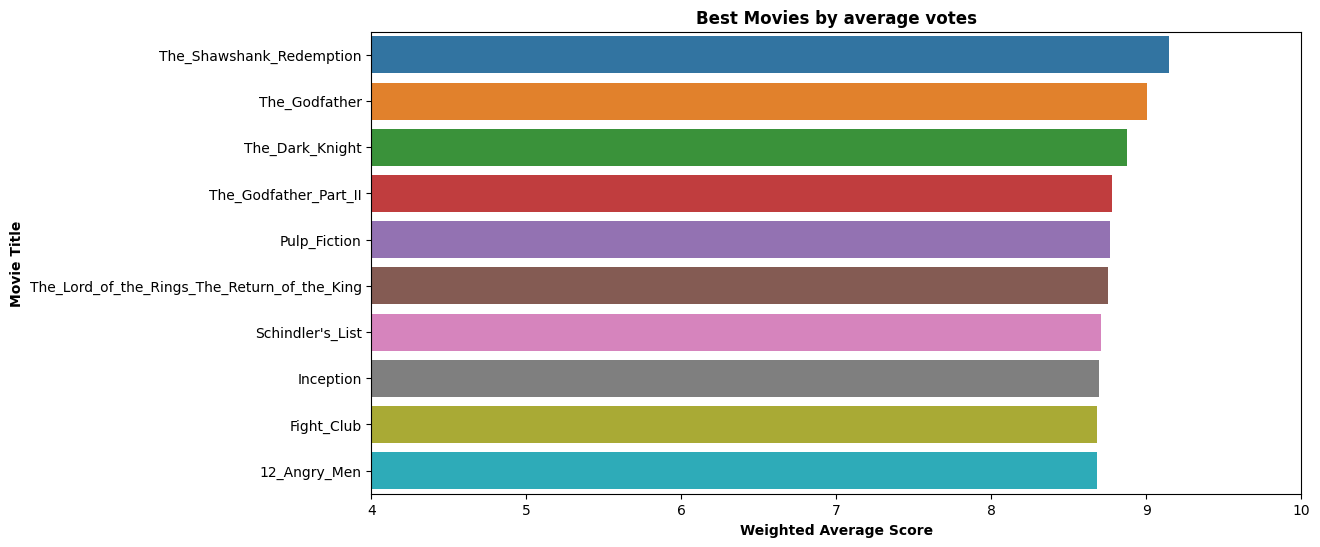

In [ ]:
#Visualization Part of Weighted Average
weight_average = movie_df.sort_values('weighted_average',ascending=False)
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=weight_average['weighted_average'].head(10), y=weight_average["title"].head(10), data=weight_average)
plt.xlim(4, 10)
plt.title('Best Movies by average votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_movies.png')

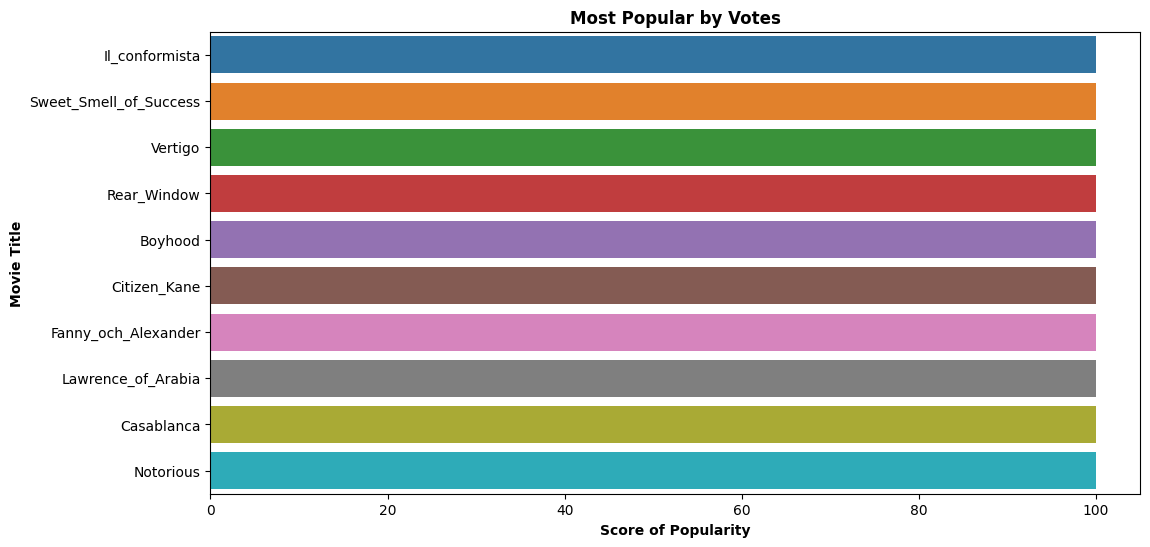

In [ ]:
popularity=movie_sorted_ranking.sort_values('score',ascending=False)
plt.figure(figsize=(12,6))
ax=sns.barplot(x=popularity['score'].head(10), y=popularity['title'].head(10), data=popularity)
plt.title('Most Popular by Votes', weight='bold')
plt.xlabel('Score of Popularity', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_popular_movies.png')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()

movie_scaled_df=scaling.fit_transform(movie_df[['weighted_average','score']])
movie_normalized_df=pd.DataFrame(movie_scaled_df,columns=['weighted_average','popularity'])

movie_normalized_df.head()

,weighted_average,popularity
0,1.000000,0.722222
1,0.901261,1.000000
2,0.814633,0.777778
3,0.745178,0.861111
4,0.676822,0.944444


In [ ]:
num_rows =  movie_df['genre'].shape[0]
genres = movie_df['genre'].value_counts().reset_index()
genres['index'] = genres['index'].str.split(",")

In [ ]:
genre_types = []
for i in range(genres.shape[0]):
    for j in genres['index'][i]:
        genre_types.append(j)
genre_types = [x.strip(' ') for x in genre_types]
genre_types_1 = [*(set(genre_types)),] #converting set to list list(set()) gives error
genre_types = pd.DataFrame(genre_types)
genre_types.value_counts().sum

Drama        108
Comedy        47
Adventure     45
Action        42
Crime         35
Thriller      32
Mystery       30
Fantasy       26
Romance       24
Animation     21
Sci-Fi        20
Biography     17
Family        17
War           17
Horror        16
History       13
Music         12
Musical       10
Film-Noir     10
Western        8
Sport          5
dtype: int64

<AxesSubplot: ylabel='0'>

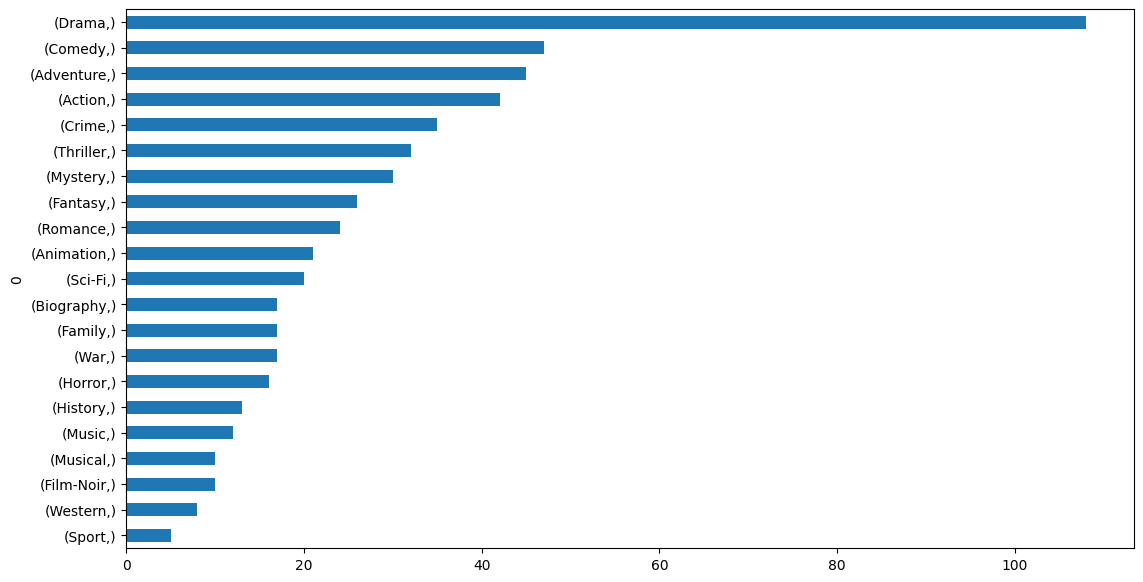

In [ ]:
genre_types.value_counts().sort_values().plot(kind='barh',figsize=(13,7))

In [ ]:
new_df = movie_df.explode('genre')
new_df = pd.crosstab(
    new_df, movie_df['genre']
).reset_index().rename_axis(columns=None)


ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

In [ ]:
## Recommendation using genre part
movie = pd.read_sql_query("SELECT * FROM web_movie;", con)
rating = pd.read_sql_query("SELECT * FROM web_myrating;", con)
movie.certificate.fillna('',inplace = True)
movie.score.fillna(0,inplace = True)


# First let's make a copy of the movies_df.
movies_with_genres = movie.copy(deep=True)
movies_with_genres = movies_with_genres.drop(['movie_logo_link','movie_logo','released_year','certificate','runtime','imdb_ratings','overview','score','director','stars','no_of_votes'],1)
movies_with_genres_list = movies_with_genres.genre.str.get_dummies(sep = ", ")
# Let's iterate through movies_df, then append the movie genres as columns of 1s or 0s.
# 1 if that column contains movies in the genre at the present index and 0 if not.
movies_with_genres_list = movies_with_genres_list.multiply(1.0)
movies_with_genres = pd.concat([movies_with_genres,movies_with_genres_list],axis=1)


rating.isna().sum()


random_user = 14

random_user_df = rating[rating['user_id'] == random_user]
random_user_movie_df = random_user_df.merge(movie,how="left",on="movie_id")


random_user_movie_df_ratings = random_user_movie_df.drop(['id','user_id','genre','imdb_ratings','score','director','stars','no_of_votes','movie_logo_link','movie_logo','released_year','certificate','runtime','overview'],1)


# filter the selection by outputing movies that exist in both Lawrence_movie_ratings and movies_with_genres.
random_user_movie_df_genres = movies_with_genres[movies_with_genres.movie_id.isin(random_user_movie_df_ratings.movie_id)]


random_user_movie_df_genres.reset_index(drop = True,inplace = True)
random_user_movie_df_genres.drop(['movie_id','title','genre'],axis=1,inplace=True)

random_user_profile = random_user_movie_df_genres.T.dot(random_user_movie_df_ratings.rating)

# let's set the index to the movieId.
movies_with_genres = movies_with_genres.set_index(movies_with_genres.movie_id)

# Deleting four unnecessary columns.
movies_with_genres.drop(['movie_id','title','genre'], axis=1, inplace=True)

random_user_recommendation_table = (movies_with_genres.dot(random_user_profile))/random_user_profile.sum() 

random_user_recommendation_table.sort_values(ascending = False,inplace = True)

top_18_index = random_user_recommendation_table.index[:18].tolist()

recommended_movies = movie.loc[top_18_index, : ]
recommended_movies = recommended_movies.reset_index()


# print(movie['genre'])
# print(movies_with_genres)
# print(rating)
# print(user_movie_df)
# print(user_movie_df_genres)
# print(user_movie_df_genres
# print(random_user_movie_df_ratings.shape)
# print(random_user_movie_df_genres.shape)
# print(random_user_profile)
# print(movies_with_genres)
# print(random_user_recommendation_table)
# print(recommendation_list)
print(recommended_movies[['title','genre']])


C:\Users\jaymr\AppData\Local\Temp\ipykernel_18696\494152079.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  movies_with_genres = movies_with_genres.drop(['movie_logo_link','movie_logo','released_year','certificate','runtime','imdb_ratings','overview','score','director','stars','no_of_votes'],1)
C:\Users\jaymr\AppData\Local\Temp\ipykernel_18696\494152079.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  random_user_movie_df_ratings = random_user_movie_df.drop(['id','user_id','genre','imdb_ratings','score','director','stars','no_of_votes','movie_logo_link','movie_logo','released_year','certificate','runtime','overview'],1)
C:\Users\jaymr\AppData\Local\Temp\ipykernel_18696\494152079.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

ValueError: matrices are not aligned

In [58]:
import pandas as pd
import numpy as np
import sqlite3
con = sqlite3.connect("../db.sqlite3")
cur = con.cursor()
movie = pd.read_sql_query("SELECT * FROM web_movie;", con)
rating = pd.read_sql_query("SELECT * FROM web_myrating;", con)
movie.certificate.fillna('',inplace = True)
movie.score.fillna(0,inplace = True)

In [59]:
# First let's make a copy of the movies_df.
movies_with_genres = movie.copy(deep=True)
movies_with_genres = movies_with_genres.drop(['movie_logo_link','movie_logo','released_year','certificate','runtime','imdb_ratings','overview','score','director','stars','no_of_votes'],1)
movies_with_genres_list = movies_with_genres.genre.str.get_dummies(sep = ", ")
movies_with_genres_list = movies_with_genres_list.multiply(1.0)
movies_with_genres = pd.concat([movies_with_genres,movies_with_genres_list],axis=1)
movies_with_genres

C:\Users\jaymr\AppData\Local\Temp\ipykernel_11884\3711140918.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  movies_with_genres = movies_with_genres.drop(['movie_logo_link','movie_logo','released_year','certificate','runtime','imdb_ratings','overview','score','director','stars','no_of_votes'],1)


,movie_id,title,genre,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,The_Shawshank_Redemption,Drama,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,The_Godfather,"Crime, Drama",0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,The_Dark_Knight,"Action, Crime, Drama",1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,The_Godfather_Part_II,"Crime, Drama",0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,12_Angry_Men,"Crime, Drama",0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Breakfast_at_Tiffany's,"Comedy, Drama, Romance",0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
996,997,Giant,"Drama, Western",0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
997,998,From_Here_to_Eternity,"Drama, Romance, War",0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
998,999,Lifeboat,"Drama, War",0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [60]:
random_user = 17
random_user_df = rating[rating['user_id'] == random_user]
random_user_movie_df = random_user_df.merge(movie,how="left",on="movie_id")
random_user_movie_df_ratings = random_user_movie_df.drop(['id','user_id','genre','imdb_ratings','score','director','stars','no_of_votes','movie_logo_link','movie_logo','released_year','certificate','runtime','overview'],1)
random_user_movie_df_ratings

C:\Users\jaymr\AppData\Local\Temp\ipykernel_11884\4261100345.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  random_user_movie_df_ratings = random_user_movie_df.drop(['id','user_id','imdb_ratings','score','director','stars','no_of_votes','movie_logo_link','movie_logo','released_year','certificate','runtime','overview'],1)


,movie_id,rating,title,genre
0,869,0,Rebel_Without_a_Cause,Drama
1,10,5,Fight_Club,Drama
2,2,5,The_Godfather,"Crime, Drama"
3,18,5,One_Flew_Over_the_Cuckoo's_Nest,Drama


In [61]:
# random_user_movie_df_genres = movies_with_genres[movies_with_genres.movie_id.isin(random_user_movie_df_ratings.movie_id.unique())]
random_user_movie_df_genres = movies_with_genres.merge(random_user_movie_df_ratings,how='inner',on=['movie_id','title'])
# print(random_user_movie_df_genres)
random_user_movie_df_genres.reset_index(drop = True,inplace = True)
random_user_movie_df_genres.drop(['movie_id','title','genre','rating'],axis = 1,inplace = True)
print(random_user_movie_df_genres.T)
random_user_profile = random_user_movie_df_genres.T.dot(random_user_movie_df_ratings.rating)
random_user_profile


KeyError: "['genre'] not found in axis"

In [ ]:
print(random_user_movie_df_ratings.shape,random_user_movie_df_genres.shape)
# random_user_profile = random_user_movie_df_genres.T.dot(random_user_movie_df_ratings.rating)
random_user_profile

(4, 3) (4, 21)


Action        0.0
Adventure    10.0
Animation    10.0
Biography     5.0
Comedy        5.0
Crime         0.0
Drama        10.0
Family        0.0
Fantasy       0.0
Film-Noir     0.0
History       5.0
Horror        0.0
Music         0.0
Musical       0.0
Mystery       0.0
Romance       0.0
Sci-Fi        0.0
Sport         0.0
Thriller      0.0
War           0.0
Western       0.0
dtype: float64

In [ ]:
movies_with_genres = movies_with_genres.set_index(movies_with_genres.movie_id)
movies_with_genres.drop(['movie_id','title','genre'], axis=1, inplace=True)
movies_with_genres

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
998,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
print(movies_with_genres.shape,random_user_profile.shape)

(1000, 21) (21,)


In [ ]:
random_user_recommendation_table = (movies_with_genres.dot(random_user_profile))/random_user_profile.sum() 
random_user_recommendation_table.sort_values(ascending = False,inplace = True)
random_user_recommendation_table

movie_id
333     0.666667
220     0.666667
44      0.666667
987     0.666667
742     0.666667
          ...   
172     0.000000
854     0.000000
188     0.000000
848     0.000000
1000    0.000000
Length: 1000, dtype: float64

In [ ]:
top_18_index = random_user_recommendation_table.index[:12].tolist()
recommended_movies = movie.loc[top_18_index, : ]
recommended_movies = recommended_movies.reset_index()
recommended_movies[['title','genre']]

,title,genre
0,Wonder,"Drama, Family"
1,Kahaani,"Mystery, Thriller"
2,Terminator_2_Judgment_Day,"Action, Sci-Fi"
3,Midnight_Express,"Biography, Crime, Drama"
4,Detachment,Drama
5,The_Terminator,"Action, Sci-Fi"
6,Glory,"Biography, Drama, History"
7,How_to_Train_Your_Dragon,"Animation, Action, Adventure"
8,Drishyam,"Crime, Drama, Mystery"
9,Frost/Nixon,"Biography, Drama, History"
